In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import scipy as sci

In [13]:
comb_path = os.path.join("comb_Tcopy.csv")
raw_path = os.path.join("gps_Tcopy.csv")
review_path = os.path.join("gps_reviews_Tcopy.csv")

In [14]:
raw_df = pd.read_csv(raw_path, low_memory=False)
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
money_df = raw_df.loc[:, ['App', 'Type', 'Price']]
#money_df['Price'] = money_df['Price'].replace('[\$,]', '', regex=True).astype(float)
#money_df = money_df.groupby(['Type'], as_index=False).agg({'App' : 'count', 'Price' : 'mean'})

money_df

DataError: No numeric types to aggregate

In [4]:
comb_df = pd.read_csv(comb_path, low_memory=False)
comb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [72]:
sentiment_df = comb_df.loc[:, ['App', 'Type', 'Price', 'Sentiment_Polarity']]
sentiment_df = sentiment_df.dropna()
sentiment_df['Price'] = sentiment_df['Price'].str.replace('$', '')
sentiment_df['Price'] = sentiment_df['Price'].astype('float')
sent_plot_df = sentiment_df.copy()
sentiment_df = sentiment_df.groupby(['App'], as_index=False).agg({'Type' : 'count', 'Price' : 'mean', 'Sentiment_Polarity' : 'mean'})
sentiment_df = sentiment_df.rename(columns={'Type': 'Number of Reviews'})
sentiment_df['Price'] = sentiment_df['Price'].map('${:,.2f}'.format)

sentiment_df

,App,Number of Reviews,Price,Sentiment_Polarity
0,10 Best Foods for You,388,$0.00,0.470733
1,11st,40,$0.00,0.181294
2,1800 Contacts - Lens Store,160,$0.00,0.318145
3,1LINE – One Line with One Touch,38,$0.00,0.196290
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,32,$0.00,0.449566
...,...,...,...,...
811,Hotels.com: Book Hotel Rooms & Find Vacation D...,136,$0.00,0.101622
812,Hotspot Shield Free VPN Proxy & Wi-Fi Security,34,$0.00,0.251765
813,Hotstar,32,$0.00,0.038178
814,Hotwire Hotel & Car Rental App,33,$0.00,0.187029


<function matplotlib.pyplot.show(*args, **kw)>

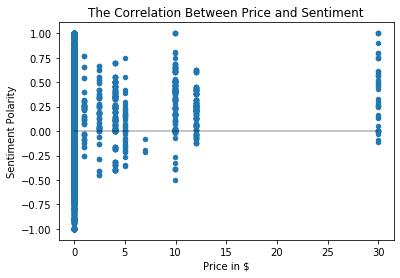

In [88]:
sent_plot_df.plot.scatter(y='Sentiment_Polarity', x='Price')
plt.hlines(0, 0, 30, alpha=0.3)
plt.title("The Correlation Between Price and Sentiment")
plt.xlabel("Price in $")
plt.ylabel("Sentiment Polarity")

plt.show